# Sentiment Analysis - Word2Vec
## Binomial Classification
------------------------------------
## Initialize Libraries

In [108]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn  

In [3]:
import nltk 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
# nltk.download('omw-1.4')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('words')

In [23]:
import gensim
from gensim.models import Word2Vec

import string
import re

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\carol\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\carol\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\carol\AppData\Roaming\nltk_data...
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\carol\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [13]:
import warnings
warnings.filterwarnings(action='ignore')

## Import Data

In [167]:
# df1.to_csv('data/working_df.csv')
df1=pd.read_csv('data/working_df.csv')

### Train-Test Split

In [109]:
# libraries
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [72]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(df1[['summary','rev_clean']],df1['sentiment'], 
                                                    test_size=0.2, random_state = 40)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19294, 2) (9504, 2) (19294,) (9504,)


In [73]:
print("Value counts for Train sentiments:")
print(y_train.value_counts())
print('\n')
print("Value counts for Test sentiments:")
print(y_test.value_counts())

Value counts for Train sentiments:
positive    15120
negative     4174
Name: sentiment, dtype: int64


Value counts for Test sentiments:
positive    7454
negative    2050
Name: sentiment, dtype: int64


In [74]:
# calculate balance
tr_b = 100* 15120 / (15120+4174)
te_b = 100* 7454 / (7454+2050)
print('Train Positive:',tr_b,'%, Test Positive:',te_b,'%')

Train Positive: 78.36633150202135 %, Test Positive: 78.43013468013469 %


## Generating Word2Vec Embedding

In [113]:
from gensim.models import Word2Vec

# Embedding created with the Skip-gram parameter. 
size_dim = 100 
window = 3 
min_count = 10 
sg = 1 
Xtr = pd.Series(X_train['rev_clean']).values
Xte = pd.Series(X_test['rev_clean']).values
ytr = pd.Series(y_train).values
yte = pd.Series(y_test).values

# Train the Word2Vec Model --X_train, X_test, y_train, y_test
# w2v_model = Word2Vec(review,vector_size=100, min_count = min_count, workers = 4, window = window, sg = sg)
w2v_Xtr = Word2Vec(Xtr,vector_size=100, min_count = min_count, workers = 4, window = window, sg = sg)
w2v_Xte = Word2Vec(Xte,vector_size=100, min_count = min_count, workers = 4, window = window, sg = sg)
w2v_ytr = Word2Vec(ytr,vector_size=100, min_count = min_count, workers = 4, window = window, sg = sg)
w2v_yte = Word2Vec(yte,vector_size=100, min_count = min_count, workers = 4, window = window, sg = sg)

## Model Training

### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [85]:
lr_model = LogisticRegression(C=5e1, solver='lbfgs', multi_class='ovr', random_state=40, n_jobs=-1)

In [86]:
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=41)

In [142]:
# fit the model
lr_model.fit(w2v_Xtr, y_train_df)

LogisticRegression(C=50.0, multi_class='ovr', n_jobs=-1, random_state=40)

In [144]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report, confusion_matrix

In [148]:
lr_tr_pred = lr_model.predict(w2v_Xtr)

In [151]:
print ('Accuracy:', accuracy_score(y_train_df, lr_tr_pred))
print ('F1 score:', f1_score(y_train_df, lr_tr_pred,average='micro'))
print ('Recall:', recall_score(y_train_df, lr_tr_pred,average='micro'))
print ('Precision:', precision_score(y_train_df, lr_tr_pred,average='micro'))
print ('\n Clasification report:\n', classification_report(y_train_df,lr_tr_pred))
print ('\n Confusion matrix:\n',confusion_matrix(y_train_df, lr_tr_pred))

Accuracy: 0.7836745270795543
F1 score: 0.7836745270795543
Recall: 0.7836745270795543
Precision: 0.7836745270795543

 Clasification report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00      4174
    positive       0.78      1.00      0.88     15121

    accuracy                           0.78     19295
   macro avg       0.39      0.50      0.44     19295
weighted avg       0.61      0.78      0.69     19295


 Confusion matrix:
 [[    0  4174]
 [    0 15121]]


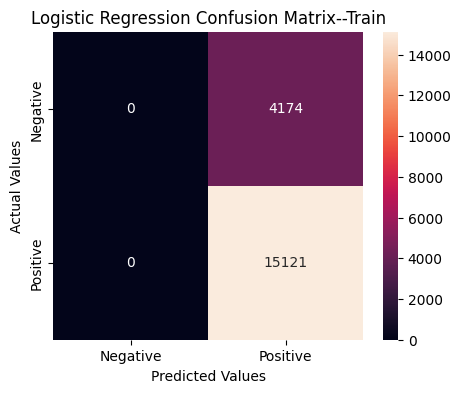

In [154]:
lrcm = confusion_matrix(y_train_df, lr_tr_pred)
lrcm_df = pd.DataFrame(lrcm,
                     index = ['Negative','Positive'], 
                     columns = ['Negative','Positive'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(lrcm_df, annot=True,fmt='g')
plt.title('Logistic Regression Confusion Matrix--Train')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [143]:
predictions = lr_model.predict(w2v_Xte)

In [146]:
print ('Accuracy:', accuracy_score(y_test, predictions))
print ('F1 score:', f1_score(y_test, predictions, average='micro'))
print ('Recall:', recall_score(y_test, predictions, average='micro'))
print ('Precision:', precision_score(y_test, predictions, average='micro'))
print ('\n Clasification report:\n', classification_report(y_test, predictions))
print ('\n Confusion matrix:\n',confusion_matrix(y_test, predictions))

Accuracy: 0.7843013468013468
F1 score: 0.7843013468013467
Recall: 0.7843013468013468
Precision: 0.7843013468013468

 Clasification report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00      2050
    positive       0.78      1.00      0.88      7454

    accuracy                           0.78      9504
   macro avg       0.39      0.50      0.44      9504
weighted avg       0.62      0.78      0.69      9504


 Confusion matrix:
 [[   0 2050]
 [   0 7454]]


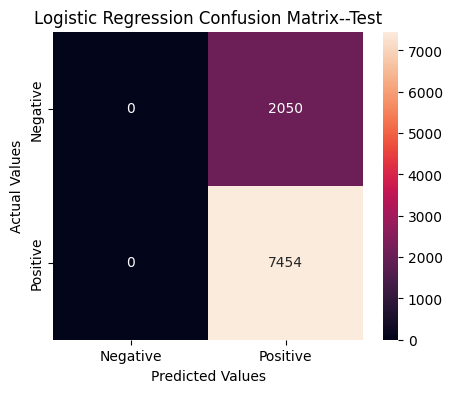

In [155]:
lrcm_test = confusion_matrix(y_test, predictions)
lrcm_t_df = pd.DataFrame(lrcm_test,
                     index = ['Negative','Positive'], 
                     columns = ['Negative','Positive'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(lrcm_t_df, annot=True,fmt='g')
plt.title('Logistic Regression Confusion Matrix--Test')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

### Naive Bayes

In [159]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB

clf_nb = MultinomialNB()

scaler = MinMaxScaler()
scaledXtrain = scaler.fit_transform(w2v_Xtr)
scaledXtest = scaler.fit_transform(w2v_Xte)

In [168]:
# Fit the model
clf_nb.fit(scaledXtrain, y_train_df)

MultinomialNB()

In [161]:
nb_train_pred = list(clf_nb.predict(scaledXtrain))

In [162]:
print ('Accuracy:', accuracy_score(y_train_df, nb_train_pred))
print ('F1 score:', f1_score(y_train_df, nb_train_pred, average='micro'))
print ('Recall:', recall_score(y_train_df, nb_train_pred, average='micro'))
print ('Precision:', precision_score(y_train_df, nb_train_pred, average='micro'))
print ('\n Clasification report:\n', classification_report(y_train_df, nb_train_pred))
print ('\n Confusion matrix:\n',confusion_matrix(y_train_df, nb_train_pred))

Accuracy: 0.7836227001813941
F1 score: 0.7836227001813941
Recall: 0.7836227001813941
Precision: 0.7836227001813941

 Clasification report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00      4174
    positive       0.78      1.00      0.88     15121

    accuracy                           0.78     19295
   macro avg       0.39      0.50      0.44     19295
weighted avg       0.61      0.78      0.69     19295


 Confusion matrix:
 [[    0  4174]
 [    1 15120]]


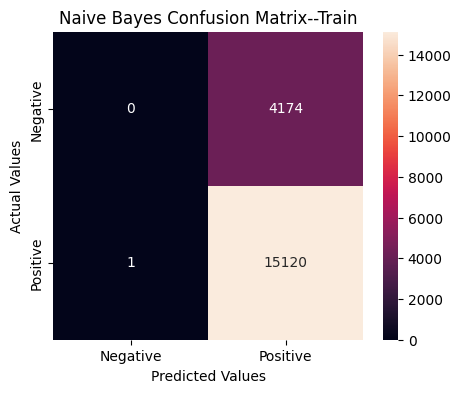

In [163]:
nbcm = confusion_matrix(y_train_df, nb_train_pred)
nbcm_df = pd.DataFrame(nbcm,
                     index = ['Negative','Positive'], 
                     columns = ['Negative','Positive'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(nbcm_df, annot=True,fmt='g')
plt.title('Naive Bayes Confusion Matrix--Train')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [164]:
nb_pred = list(clf_nb.predict(scaledXtest))

In [165]:
print ('Accuracy:', accuracy_score(y_test, nb_pred))
print ('F1 score:', f1_score(y_test, nb_pred, average='micro'))
print ('Recall:', recall_score(y_test, nb_pred, average='micro'))
print ('Precision:', precision_score(y_test, nb_pred, average='micro'))
print ('\n Clasification report:\n', classification_report(y_test, nb_pred))
print ('\n Confusion matrix:\n',confusion_matrix(y_test, nb_pred))

Accuracy: 0.2156986531986532
F1 score: 0.2156986531986532
Recall: 0.2156986531986532
Precision: 0.2156986531986532

 Clasification report:
               precision    recall  f1-score   support

    negative       0.22      1.00      0.35      2050
    positive       0.00      0.00      0.00      7454

    accuracy                           0.22      9504
   macro avg       0.11      0.50      0.18      9504
weighted avg       0.05      0.22      0.08      9504


 Confusion matrix:
 [[2050    0]
 [7454    0]]


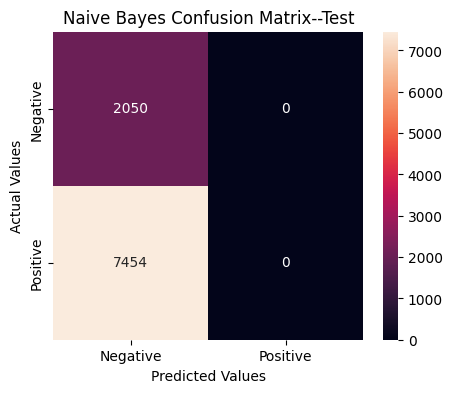

In [166]:
nbcm_test = confusion_matrix(y_test, nb_pred)
nbcm_t_df = pd.DataFrame(nbcm_test,
                     index = ['Negative','Positive'], 
                     columns = ['Negative','Positive'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(nbcm_t_df, annot=True,fmt='g')
plt.title('Naive Bayes Confusion Matrix--Test')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

### Random Forest

In [101]:
# import RF module
from sklearn.ensemble import RandomForestClassifier

# initialize model (hyperparameters not tuned yet 25 Mar)
clf_decision_word2vec = RandomForestClassifier(n_estimators= 80,  min_samples_split= 2,  min_samples_leaf= 2, 
                                               max_features= 'auto',  max_depth= 12, criterion= 'entropy',
                                               bootstrap= True, class_weight='balanced') 

start_time = time.time()

# Fit the model
clf_decision_word2vec.fit(w2v_df, y_train)

print("Time taken to fit the model with word2vec vectors: " + str(time.time() - start_time))

Time taken to fit the model with word2vec vectors: 16.75725269317627


In [102]:
train_features = []

for index, row in X_train.iterrows():
    
    vector = np.mean([w2v_model.wv[token] for token in row['rev_clean'] 
                      if token in w2v_model.wv.key_to_index], axis=0)
    
    if type(vector) is np.ndarray:
        train_features.append(vector)
    else:
        train_features.append(np.array([0 for i in range(100)]))
        
train_predictions = clf_decision_word2vec.predict(train_features)

print(classification_report(y_train, train_predictions))

              precision    recall  f1-score   support

    negative       0.46      0.66      0.54      4174
    positive       0.89      0.78      0.83     15120

    accuracy                           0.76     19294
   macro avg       0.67      0.72      0.69     19294
weighted avg       0.80      0.76      0.77     19294



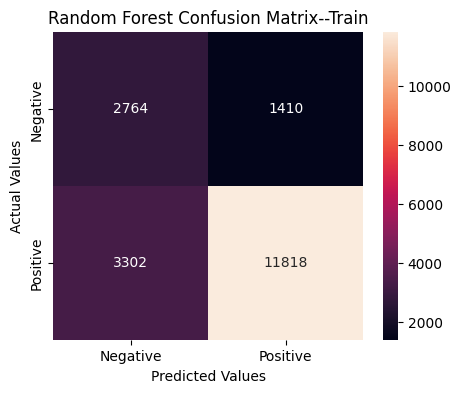

In [156]:
rfcm = confusion_matrix(y_train, train_predictions)
rfcm_df = pd.DataFrame(rfcm,
                     index = ['Negative','Positive'], 
                     columns = ['Negative','Positive'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(rfcm_df, annot=True,fmt='g')
plt.title('Random Forest Confusion Matrix--Train')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

Test Results:

In [104]:
test_features = []

for index, row in X_test.iterrows():
    
    vector = np.mean([w2v_model.wv[token] for token in row['rev_clean'] if token in w2v_model.wv.key_to_index], axis=0)
    
    if type(vector) is np.ndarray:
        test_features.append(vector)
    else:
        test_features.append(np.array([0 for i in range(100)]))
        
test_predictions = clf_decision_word2vec.predict(test_features)

print(classification_report(y_test,test_predictions))

              precision    recall  f1-score   support

    negative       0.32      0.33      0.32      2050
    positive       0.81      0.81      0.81      7454

    accuracy                           0.70      9504
   macro avg       0.57      0.57      0.57      9504
weighted avg       0.71      0.70      0.71      9504



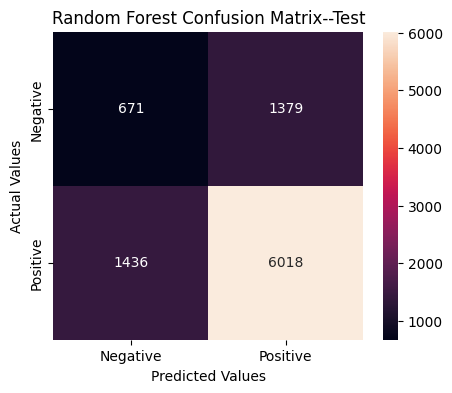

In [157]:
rfcm_test = confusion_matrix(y_test,test_predictions)
rfcm_t_df = pd.DataFrame(rfcm_test,
                     index = ['Negative','Positive'], 
                     columns = ['Negative','Positive'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(rfcm_t_df, annot=True,fmt='g')
plt.title('Random Forest Confusion Matrix--Test')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()